In [270]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch

In [271]:
df = pd.read_csv('diabetes.csv')

In [272]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [273]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [274]:
df.shape

(768, 9)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [276]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

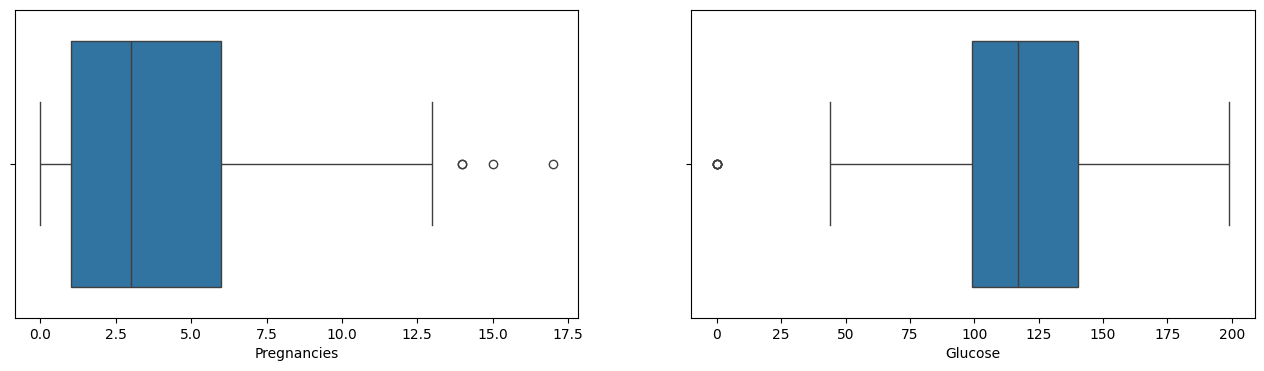

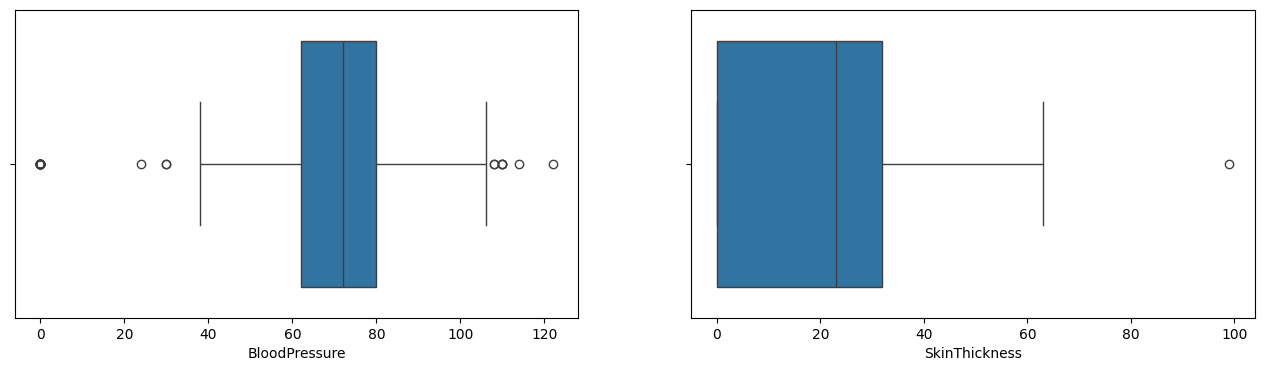

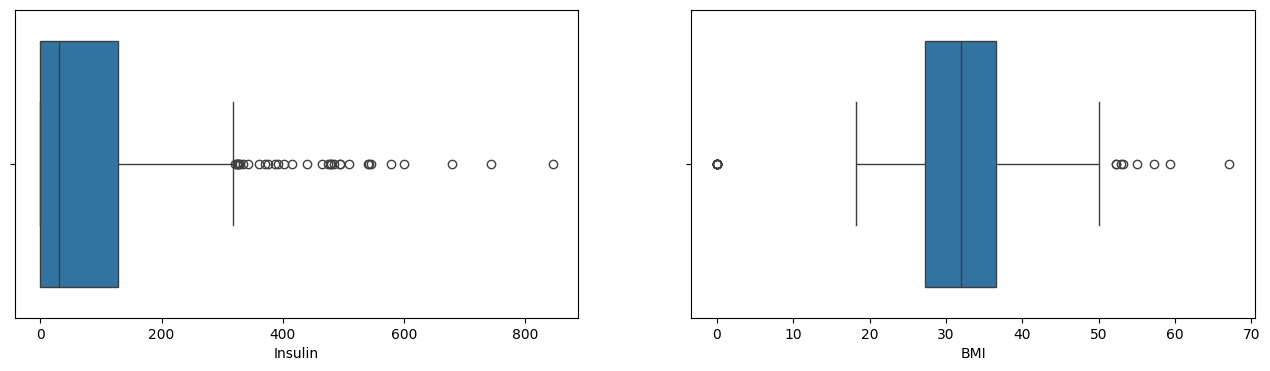

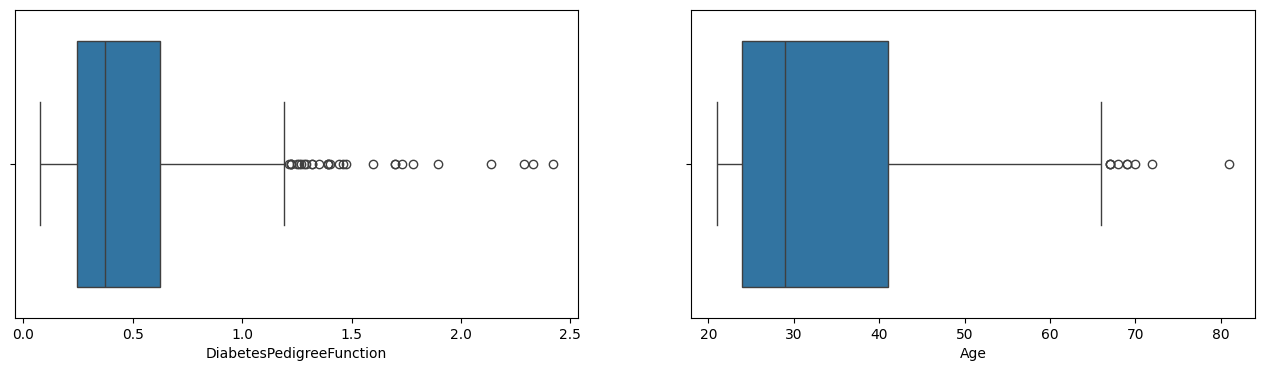

In [277]:
Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

i = 0
while i <8:
    fig = plt.figure(figsize =[16,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = df)
    i+=1
  
    plt.show()

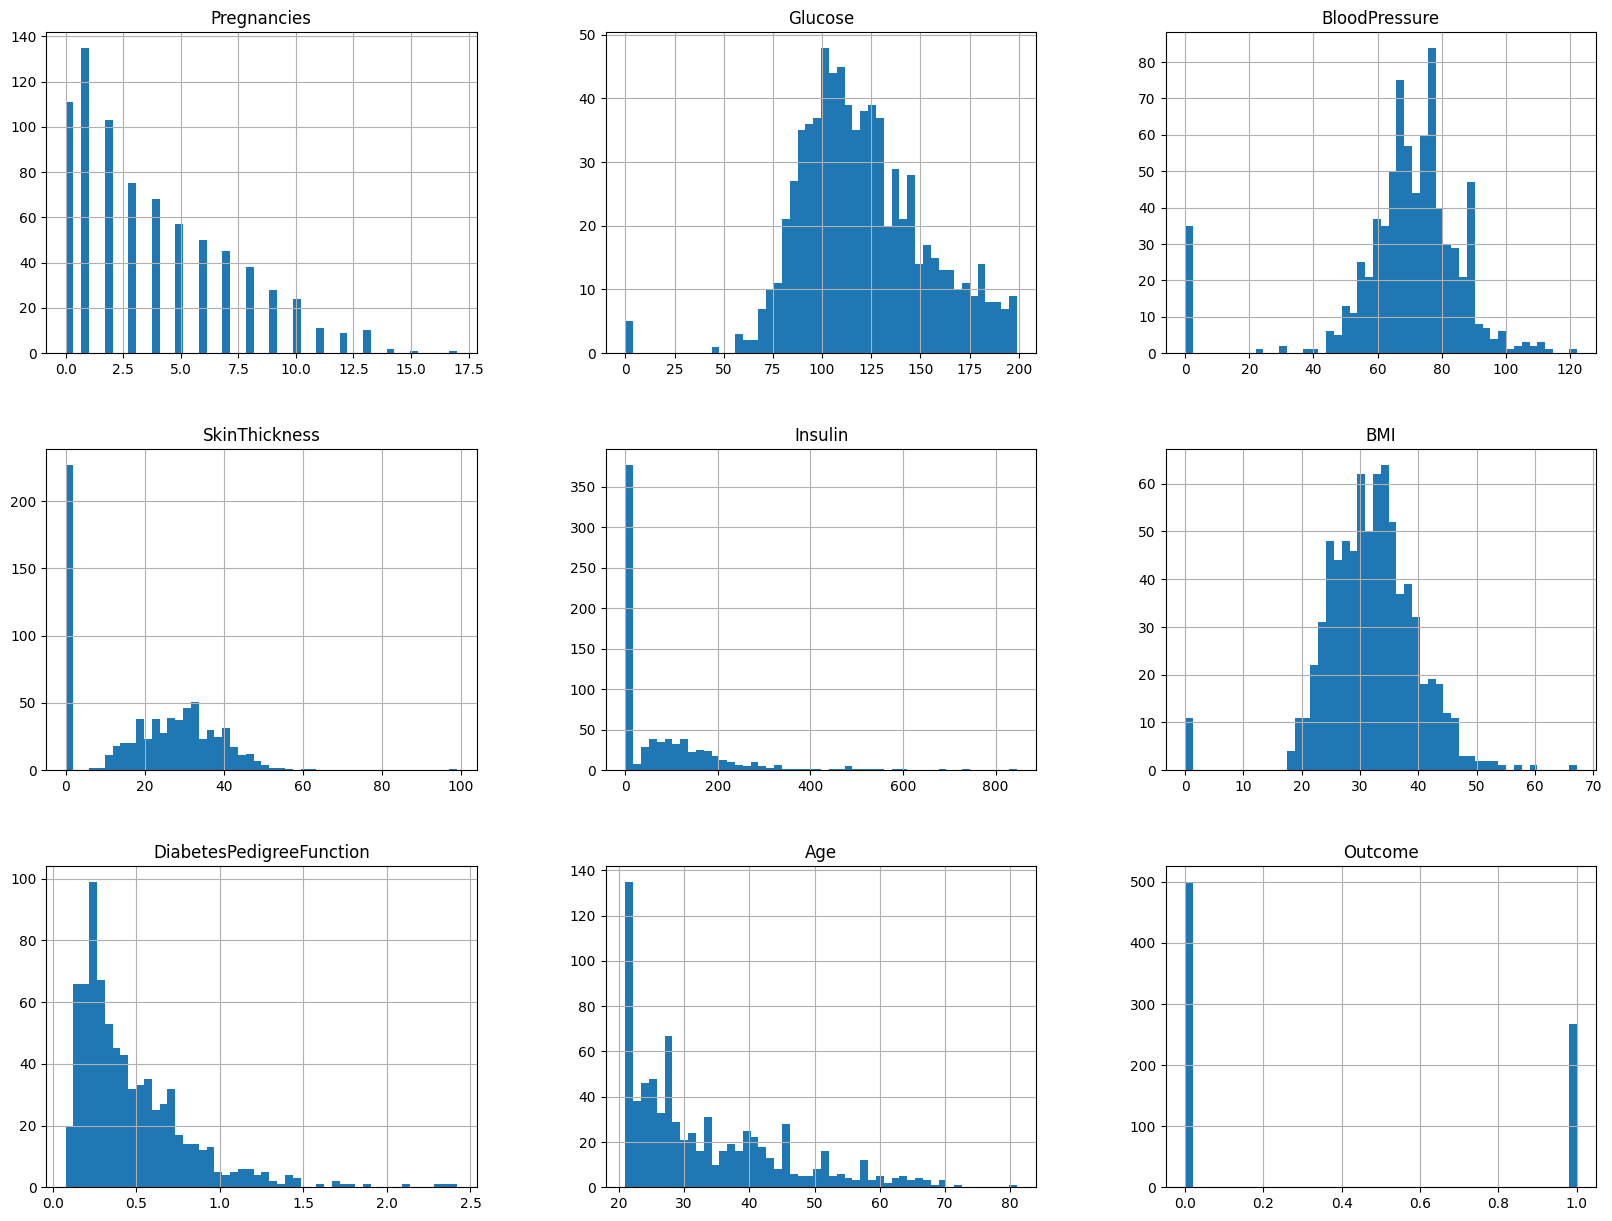

In [278]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [279]:
df_copy = df.copy()

In [280]:
#Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_copy_filter = df_copy[(df_copy['Pregnancies'] < 16)]
df_copy_filter = df_copy_filter[(df_copy_filter['Glucose'] > 55) & (df_copy_filter['Glucose'] < 200)]
df_copy_filter = df_copy_filter[(df_copy_filter['BMI'] > 15) & (df_copy_filter['BMI'] < 55)]
df_copy_filter = df_copy_filter[(df_copy_filter['DiabetesPedigreeFunction'] < 1.5)]

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

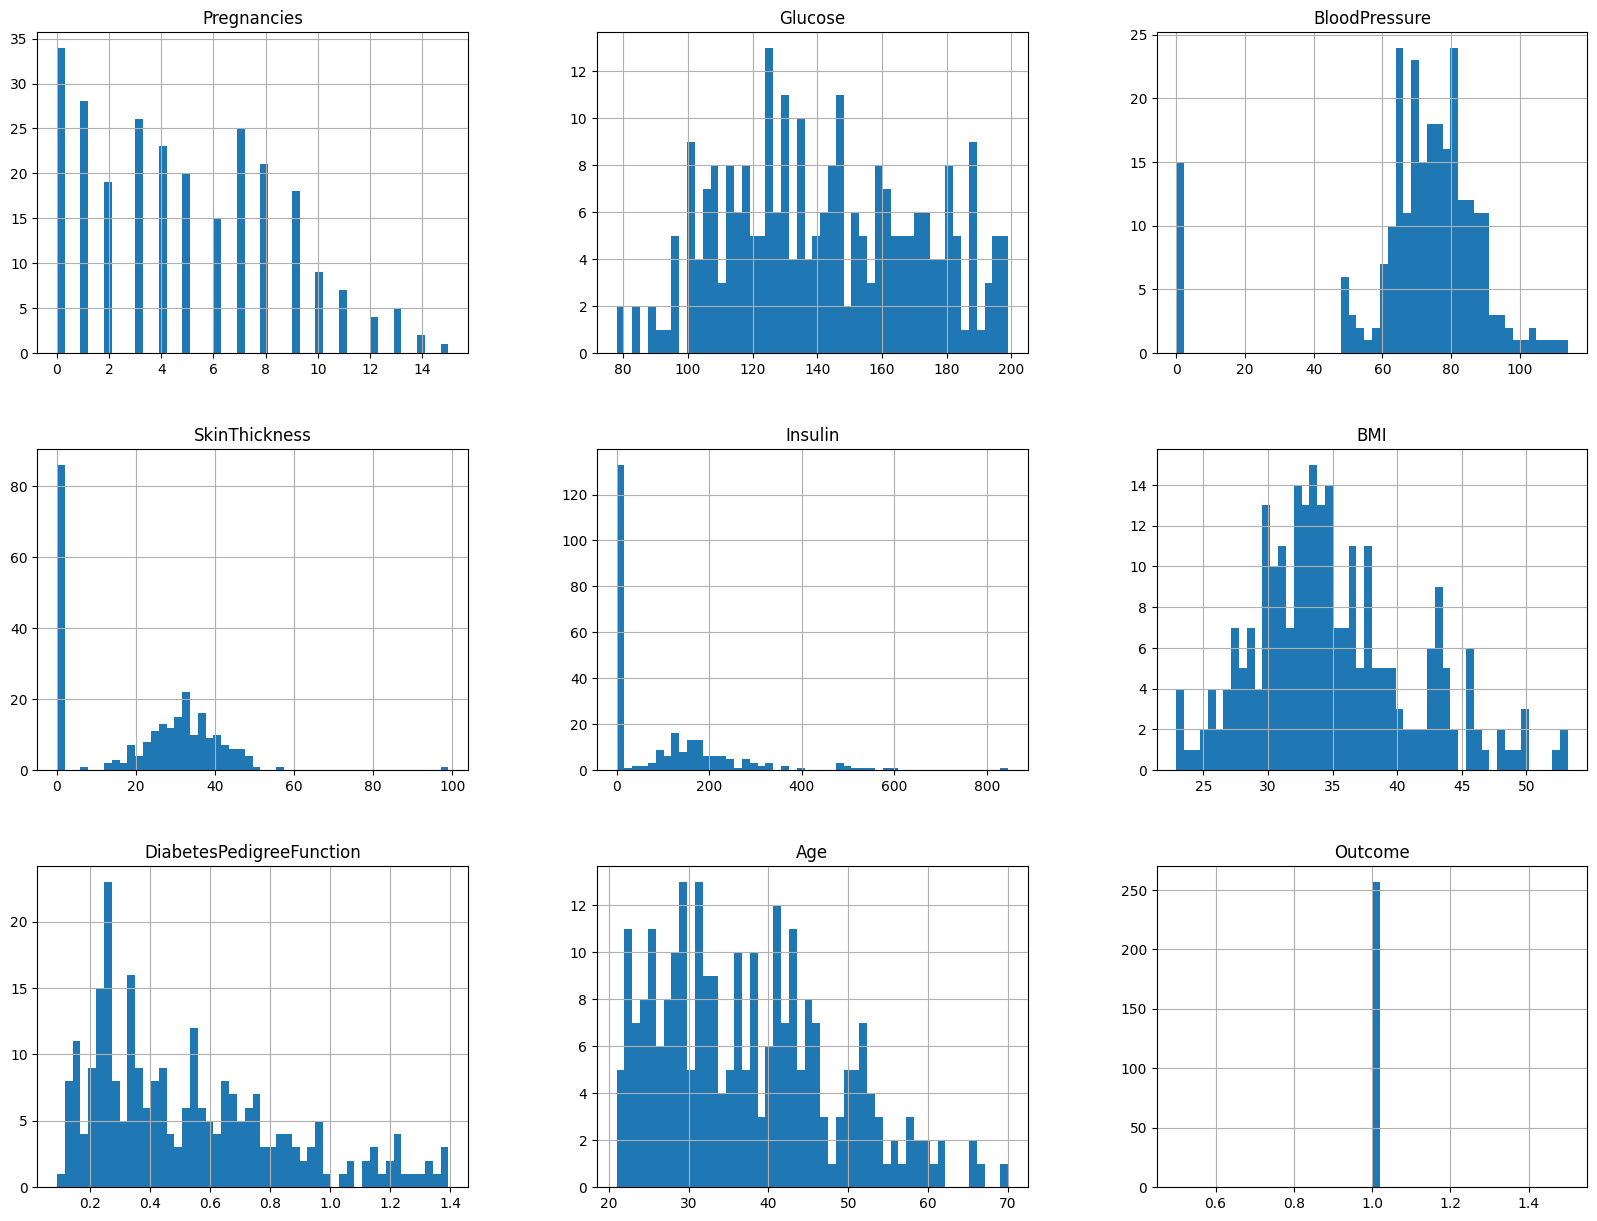

In [281]:
df_copy_filter[df_copy_filter['Outcome'] == 1].hist(bins=50,figsize=(20,15))


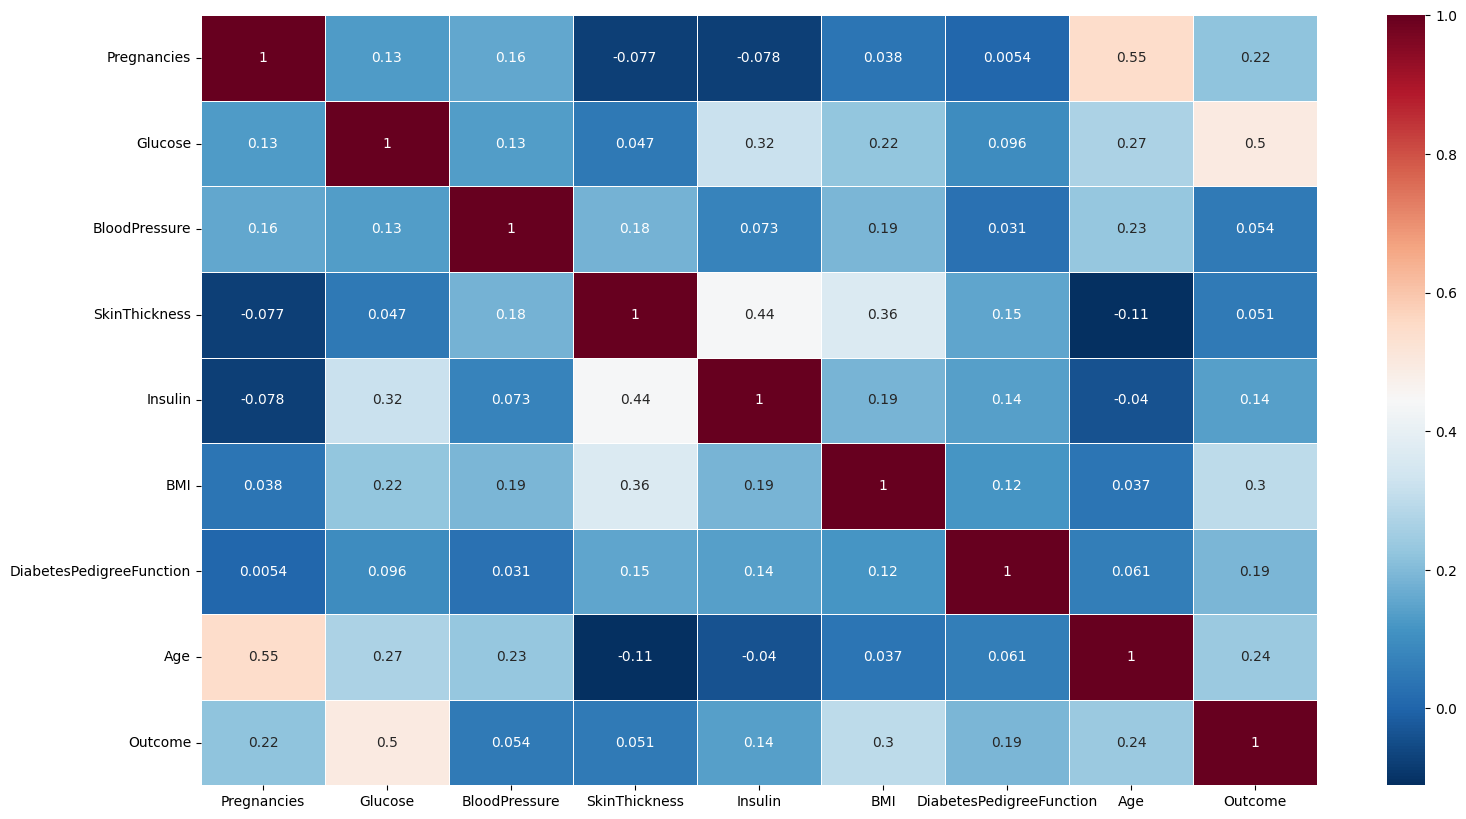

In [282]:
fig, ax = plt.subplots(figsize = (18, 10)) #Size of plot
ax = sns.heatmap(df_copy_filter.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [283]:
import random

In [284]:
import random

def balance_classes(dataframe, new_columns_number):
    # Разделение данных на признаки и целевую переменную
    filter_df = dataframe[dataframe['Outcome'] == 1 ]

    df_means = filter_df.mean()
    df_std = filter_df.std()

    for _ in range(new_columns_number):
        new_row = {
                    'Pregnancies': [int(df_means['Pregnancies'] + random.uniform(-df_std['Pregnancies'], df_std['Pregnancies']))],
                   	'Glucose': [df_means['Glucose'] + random.uniform(-df_std['Glucose'],df_std['Glucose'])],
                    'BloodPressure': [df_means['BloodPressure'] + random.uniform(-df_std['BloodPressure'],df_std['BloodPressure'])],
                    'SkinThickness': [df_means['SkinThickness'] + random.uniform(-df_std['SkinThickness'],df_std['SkinThickness'])],
                    'Insulin': [df_means['Insulin'] + random.uniform(-df_std['Insulin'],df_std['Insulin'])],
                    'BMI': [df_means['BMI'] + random.uniform(-df_std['BMI'],df_std['BMI'])],
                    'DiabetesPedigreeFunction': [df_means['DiabetesPedigreeFunction'] + random.uniform(-df_std['DiabetesPedigreeFunction'],df_std['DiabetesPedigreeFunction'])],
                    'Age': [df_means['Age'] + random.uniform(-df_std['Age'],df_std['Age'])],
                    'Outcome': [1]}
        
        new_row = pd.DataFrame(new_row)
        
        filter_df = pd.concat([filter_df,new_row], ignore_index=True)

    return filter_df

In [285]:
df_copy_balanced = balance_classes(df_copy_filter,20)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

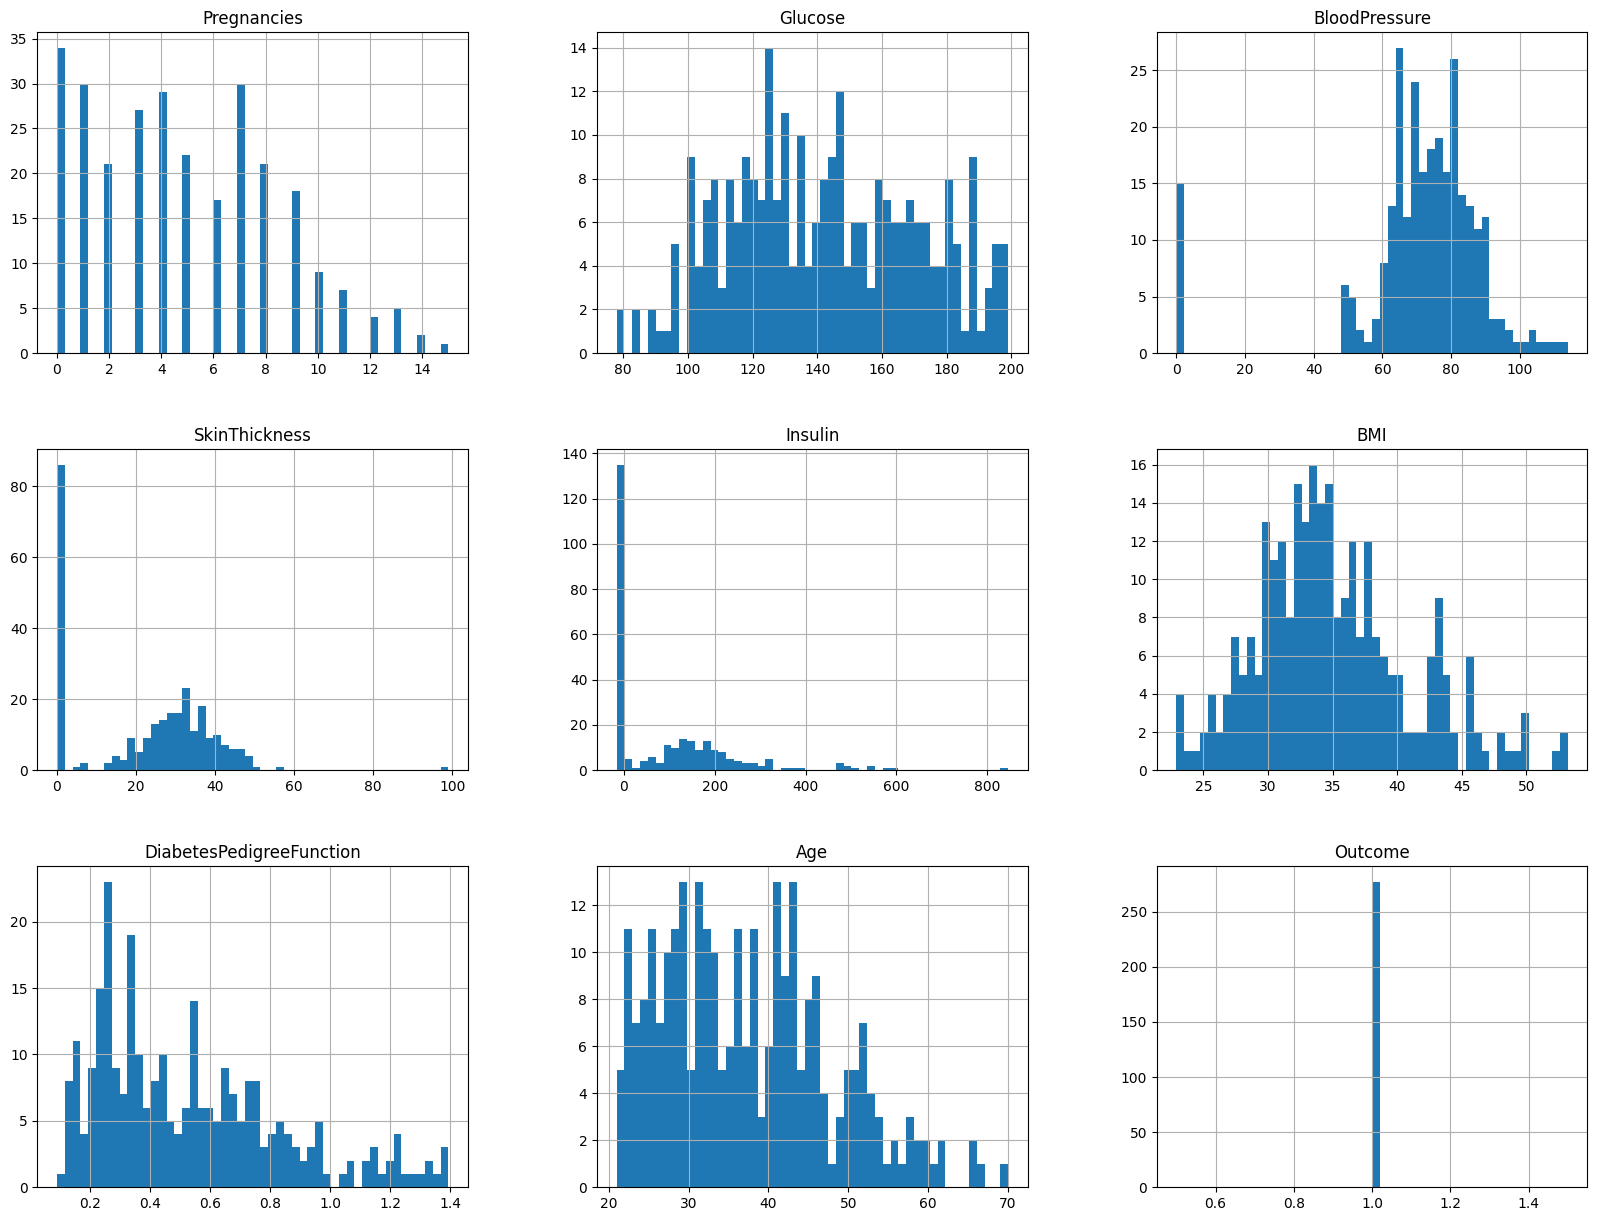

In [286]:
df_copy_balanced.hist(bins=50,figsize=(20,15))

In [287]:
df_result = pd.concat([df_copy_filter,df_copy_balanced], ignore_index=True)
#df_result = pd.concat([df_copy_filter,df_copy_filter[df_copy_filter['Outcome'] == 1]], ignore_index=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

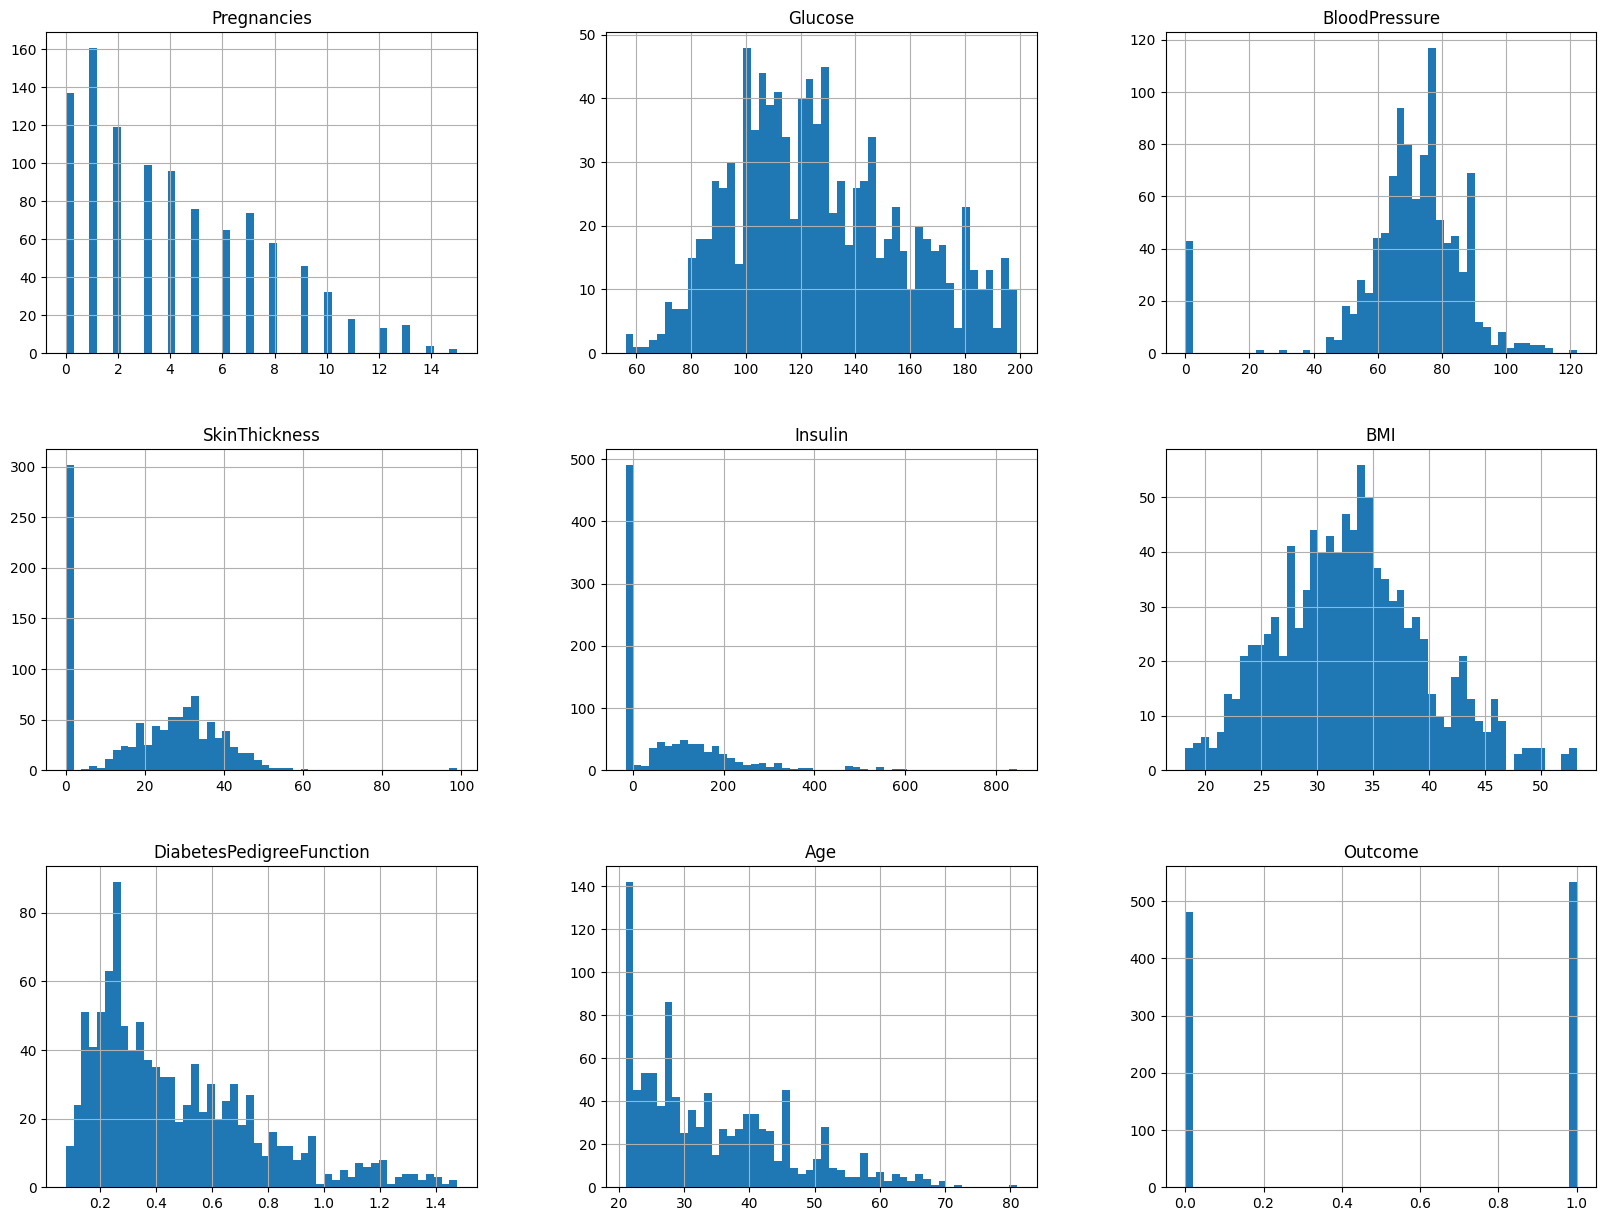

In [288]:
df_result.hist(bins=50,figsize=(20,15))

In [289]:
#sns.pairplot(df_copy,hue='Outcome')

In [290]:
for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(df_copy[df_copy[col].notna()][col])
    df_copy[col] = df_copy[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(df_copy[df_copy[col].notna()][col])
    df_copy[col] = df_copy[col].fillna(mean_col)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

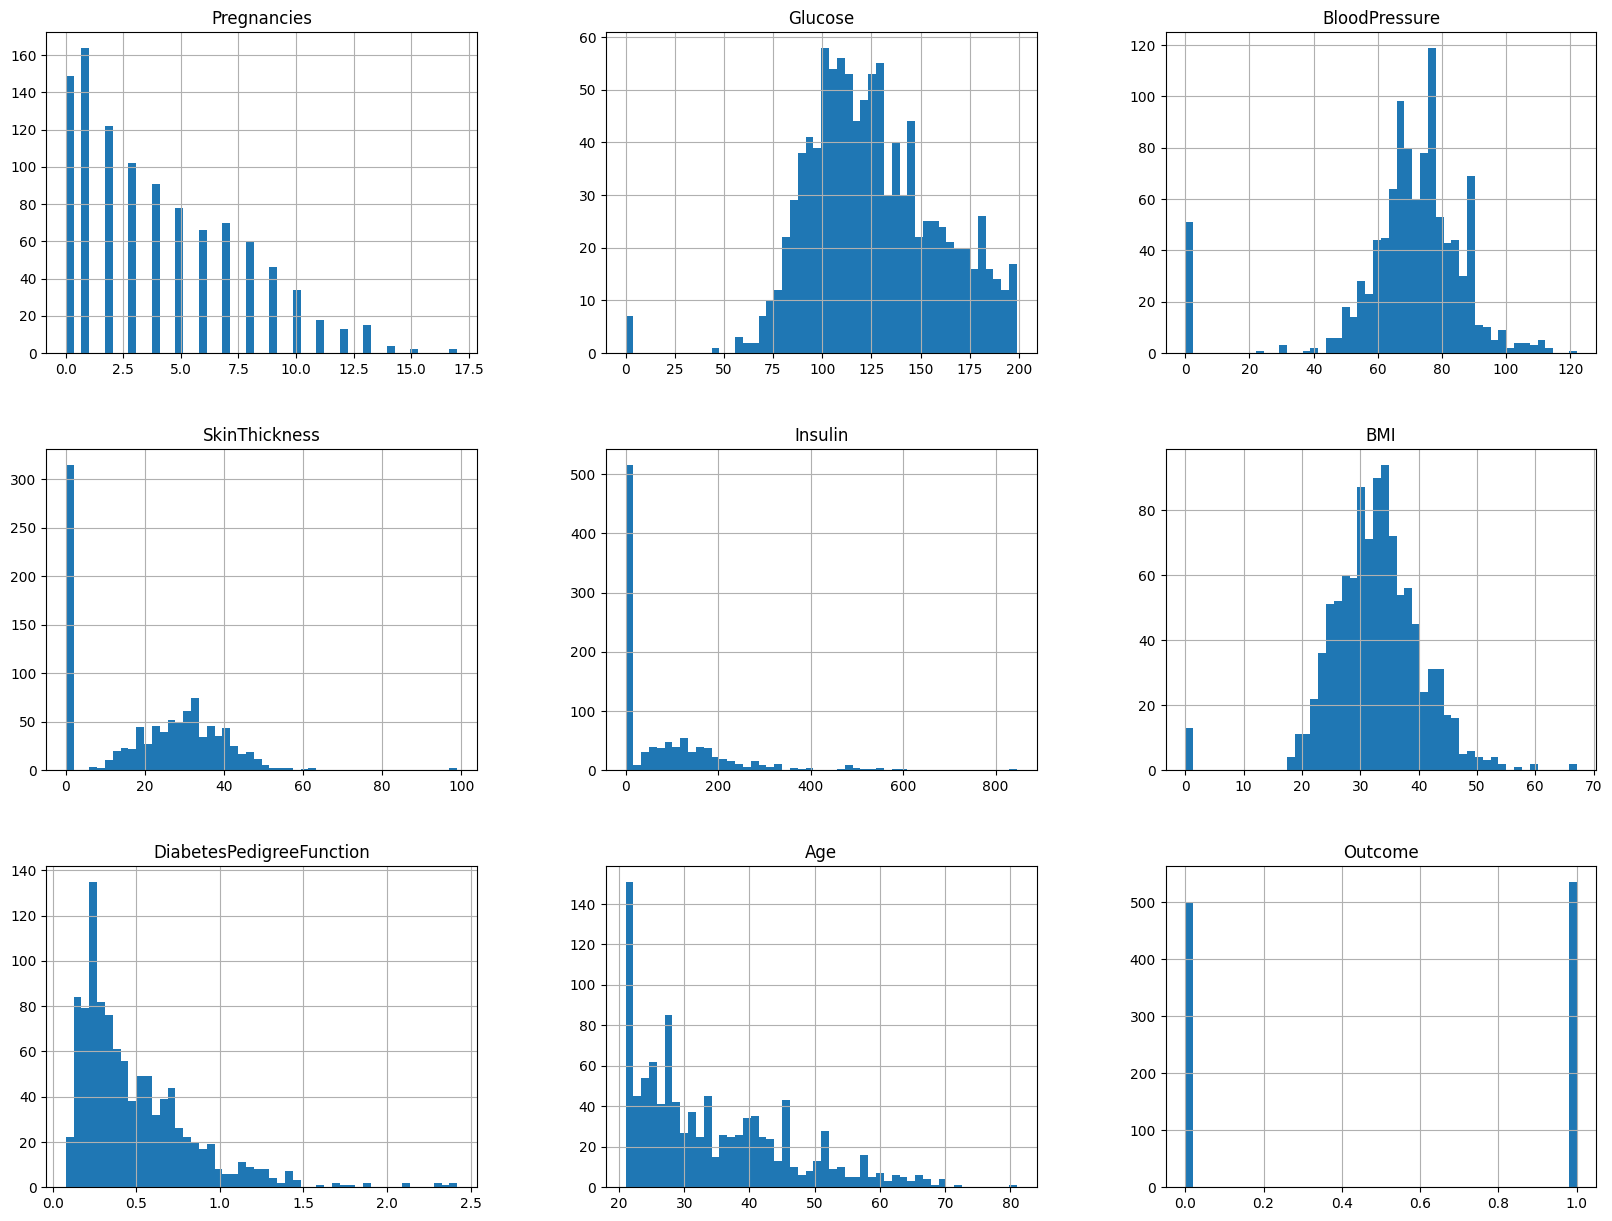

In [291]:
df_copy_2 = pd.concat([df_copy,df_copy[df_copy['Outcome'] ==1]], ignore_index=True)

df_copy_2.hist(bins=50,figsize=(20,15))

In [322]:
def split_dataframe_to_tensors(dataframe, test_size=0.25, random_state=1):
    # Преобразование pandas DataFrame в тензор PyTorch
    #data = torch.tensor(dataframe.values, dtype=torch.float)
    
    # Разделение на признаки (X) и целевую переменную (y)
    X = dataframe.iloc[:, :-1]
    y = dataframe.iloc[:, -1]

    print(X.shape)
    print(y.shape)
    
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_dataframe_to_tensors(df_copy)


(768, 8)
(768,)


In [323]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
118,4,97,60,23,0,28.2,0.443,22
205,5,111,72,28,0,23.9,0.407,27
506,0,180,90,26,90,36.5,0.314,35
587,6,103,66,0,0,24.3,0.249,29
34,10,122,78,31,0,27.6,0.512,45


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

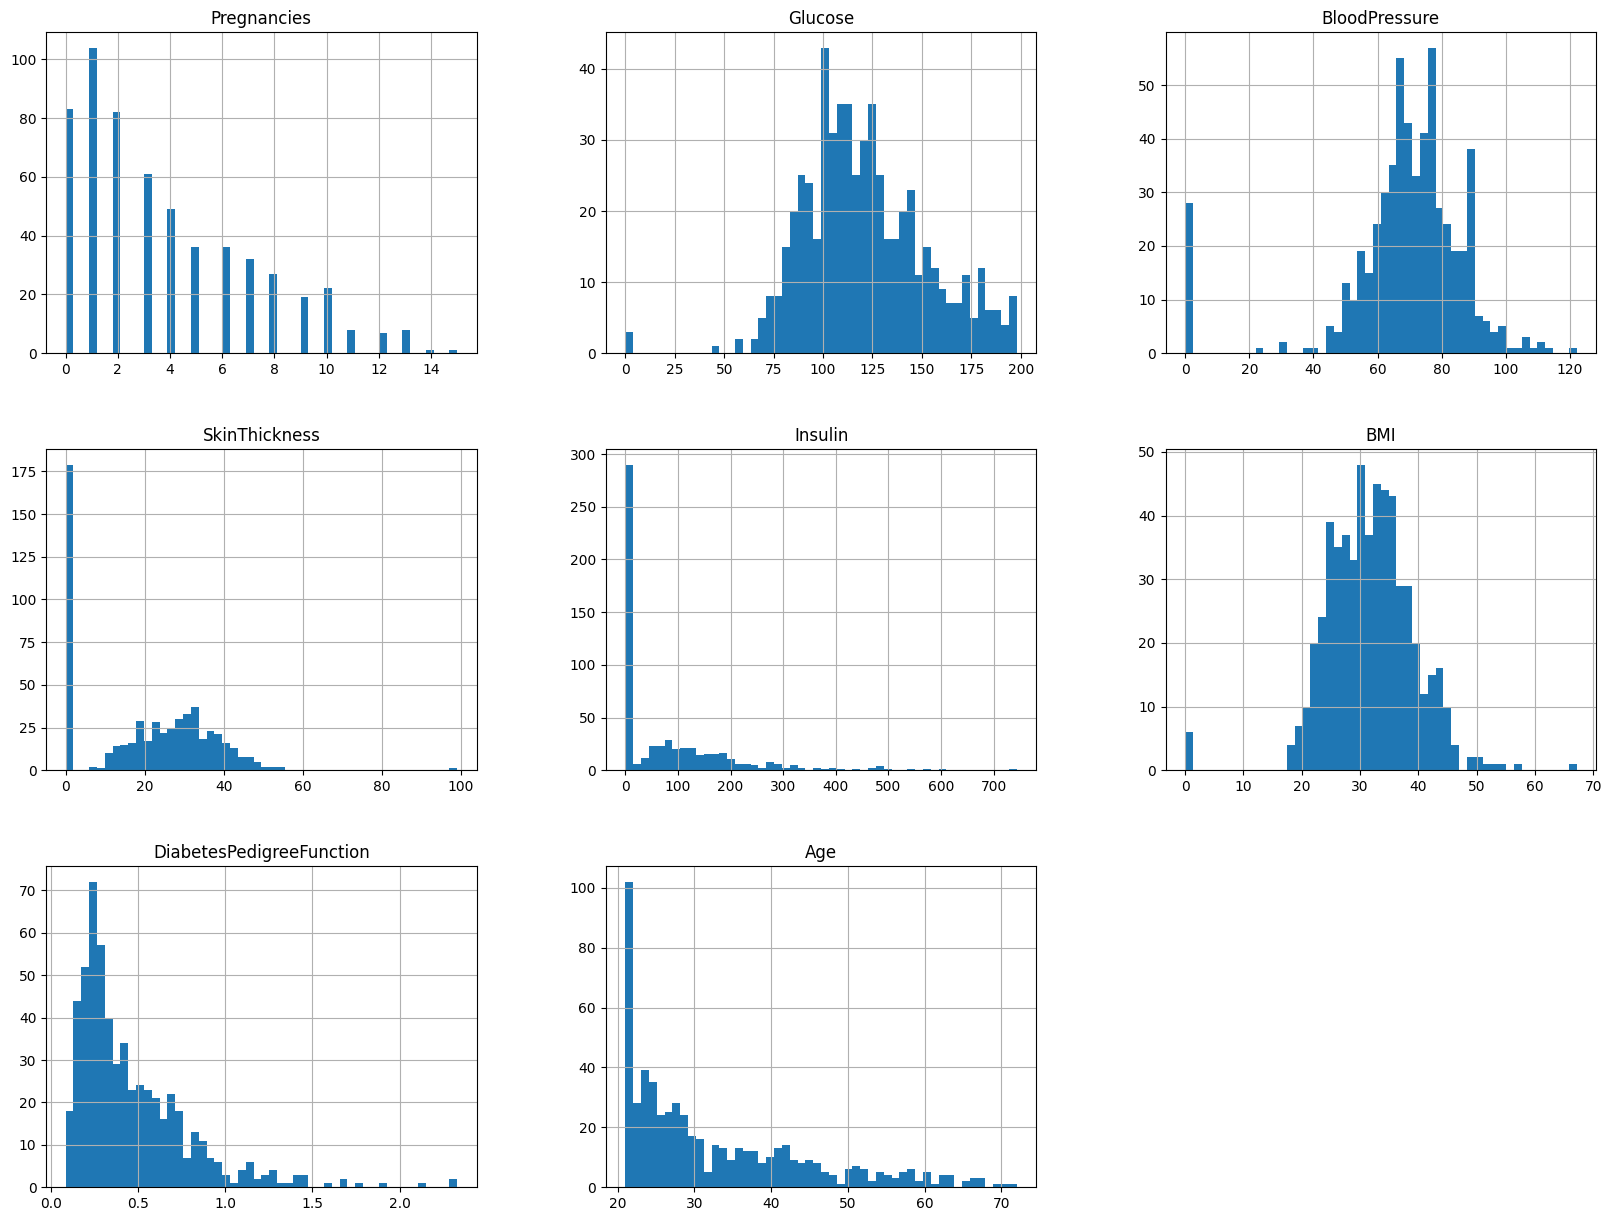

In [324]:
X_train.hist(bins=50,figsize=(20,15))

In [325]:
from sklearn.preprocessing import MinMaxScaler

In [326]:
scaler = MinMaxScaler()

X_train_normal = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [327]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [328]:
def get_device():
    return torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = get_device()
print(device)

cuda


In [329]:
import torch.nn.functional as F
import torch.nn.init as init

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(8, 1024)
        init.trunc_normal_(tensor=self.fc1.weight,mean=0,std=0.1,a=-1,b=1)

        self.dropout1 = nn.Dropout(0.5)  # Добавленный слой Dropout
        self.fc2 = nn.Linear(1024, 256)
        init.trunc_normal_(tensor=self.fc2.weight,mean=0,std=0.1,a=-1,b=1)

        self.dropout2 = nn.Dropout(0.35)
        self.fc3 = nn.Linear(256, 64)
        init.trunc_normal_(tensor=self.fc3.weight,mean=0,std=0.1,a=-1,b=1)

        self.dropout3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(64,1)
        init.trunc_normal_(tensor=self.fc4.weight,mean=0,std=0.1,a=-1,b=1)

        self.sigmoid = nn.Threshold(threshold=0.25,value=0)
    
    def forward(self, x):
        x = F.tanh(self.fc1(x))

        x = self.dropout1(x)
        x = F.tanh(self.fc2(x))

        
        x = self.dropout2(x)
        x = F.tanh(self.fc3(x))

        x = self.dropout3(x)
        x = F.tanh(self.fc4(x))

        x = self.sigmoid(x)
        x = torch.round(x)
        return x




In [330]:
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y

In [331]:
y_train.shape

(576,)

In [332]:
y_train = torch.tensor(y_train.values, dtype=torch.float)
X_train_normal = torch.tensor(X_train_normal.values,dtype=torch.float)

In [333]:
y_test = torch.tensor(y_test.values, dtype=torch.float)
X_test = torch.tensor(X_test.values,dtype=torch.float)

In [334]:
y_train = y_train.unsqueeze(1)
train_dataset = CustomDataset(X_train_normal, y_train)

y_test = y_test.unsqueeze(1)
test_dataset = CustomDataset(X_test, y_test)

In [335]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=275, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)

In [336]:
import torch.optim as optim

In [337]:
def test(model, test_loader, optimizer):
    # Установка модели в режим оценки
    model.eval()
    
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    accuracy = 100 * correct / total 
    #print(f'Точность на {optimizer.__class__.__name__}: {accuracy * 100:.2f}%')
    return accuracy

In [338]:
def train_model(model, train_loader, epochs, optimizer):
    model.train()
    criterion = nn.BCEWithLogitsLoss()
    
    accuracies = []
    test_accuracies = []

    last_accuracy = 0

    for epoch in range(epochs):
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
            # Расчет точности
            total += labels.size(0)
            correct += (outputs == labels).float().sum()
        accuracy = 100 * correct / total
        last_accuracy = accuracy

        test_accuracy = test(model=model,test_loader=test_dataloader,optimizer=optimizer) 
        #print(f"Epoch: {epoch}     Accuracy: {accuracy:.4f}    Test Accuracy:{test_accuracy:.4f}")
        #print("========")
            #print(f'Эпоха [{epoch+1}/{epochs}], Потери: {loss.item():.4f}, Точность: {accuracy.item():.4f}')
            
        #test_accuracy = test(model,test_dataloader,optimizer)
        accuracies.append(accuracy)
        test_accuracies.append(test_accuracy)
        #print(f"точность {test_accuracy}")
        if ((accuracy > 70) & (test_accuracy > 70)):
            break

    

    # Построение графика
    plt.figure(figsize=(5, 2))
    plt.plot(range(1, len(accuracies) + 1), accuracies, label='Точность на обучение')
    plt.plot(range(1, len(accuracies) + 1),  test_accuracies, label='Точность на тесте')
    plt.xlabel('Эпоха')
    plt.ylabel('Значение')
    plt.title(f'{optimizer.__class__.__name__}')
    plt.legend()
    plt.show()

    test_accuracy = test(model=model,test_loader=test_dataloader,optimizer=optimizer) 
    return( last_accuracy.item(), test_accuracy)

In [339]:
lr = 0.1 **4 
momentum = 0.1
nesterov = True
weight_decay = 0.75
epochs = 5000


In [340]:
'''model1 = NeuralNetwork()
sgd_optim = optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov,weight_decay=weight_decay)
train_model(model1,train_dataloader,epochs,sgd_optim)'''

'''model2 = NeuralNetwork()
adam_optim = optim.Adam(model2.parameters(),lr=lr,weight_decay=weight_decay,betas=(0.90,0.99), amsgrad=True)
train_model(model2,train_dataloader,epochs,adam_optim)
test(model2,test_dataloader,adam_optim)'''

'''model = NeuralNetwork()
radam_optim = optim.RAdam(model.parameters(),lr=lr,weight_decay=weight_decay)
train_model(model,train_dataloader,epochs,radam_optim)
test(model,test_dataloader,radam_optim)

model = NeuralNetwork()
nadam_optim = optim.NAdam(model.parameters(),lr=lr,weight_decay=weight_decay,momentum_decay=momentum)
train_model(model,train_dataloader,epochs,nadam_optim)
test(model,test_dataloader,nadam_optim)'''

'''model3 = NeuralNetwork()
rmsprop = optim.RMSprop(model3.parameters(),lr=lr,weight_decay=weight_decay,momentum=momentum)
train_model(model3,train_dataloader,epochs,rmsprop)
test(model3,test_dataloader,rmsprop)'''

'model3 = NeuralNetwork()\nrmsprop = optim.RMSprop(model3.parameters(),lr=lr,weight_decay=weight_decay,momentum=momentum)\ntrain_model(model3,train_dataloader,epochs,rmsprop)\ntest(model3,test_dataloader,rmsprop)'

In [341]:
#torch.save(model.state_dict(), 'model.pth')

In [342]:
columns_labels = ['model','lr', 'momentum','nesterov','weight_decay','epochs', 'train_score','test_score']
score_df = pd.DataFrame(columns=columns_labels)
score_df

,model,lr,momentum,nesterov,weight_decay,epochs,train_score,test_score


In [343]:
num_lr = [0.1 **4, 0.1 **4 * 5 , 0.1 **3,  0.1 **3 * 5, 0.1 **2,  0.1 **2 * 5, 0.1 ,0.5]
num_momentum = [0.1, 0.5, 0.75, 0.9]
num_nesterov = [True, False]
num_weight_decay = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.9]
num_epochs = [250, 500]

In [344]:
'''i = 1
for lr in num_lr:
    for momentum in num_momentum:
        for nesterov in num_nesterov:
            for weight_decay in num_weight_decay:
                for epochs in num_epochs:
                    print(f'[{i}]  optimizer: SGD | lr:{lr} | momentum:{momentum} | nesterov:{nesterov} | decay:{weight_decay} | epochs:{epochs}')
                    
                    model = NeuralNetwork()
                    sgd_optim = optim.SGD(model.parameters(),lr=lr,momentum=momentum, nesterov=nesterov,weight_decay=weight_decay)
                    train_accuracy, test_accuracy = train_model(model,train_dataloader,epochs,sgd_optim)

                    print(f'[!] train_accuracy: {round(train_accuracy,4)} | test_accuracy: {round(test_accuracy,4)}')
                    print(' ')

                    model_df = pd.DataFrame(data=[['SGD',lr,momentum,nesterov,weight_decay,epochs,train_accuracy,test_accuracy]], columns=columns_labels)
                    score_df = pd.concat([score_df,model_df], ignore_index=True)
                    
                    i = i + 1'''
                    #test(model,test_dataloader,sgd_optim)

"i = 1\nfor lr in num_lr:\n    for momentum in num_momentum:\n        for nesterov in num_nesterov:\n            for weight_decay in num_weight_decay:\n                for epochs in num_epochs:\n                    print(f'[{i}]  optimizer: SGD | lr:{lr} | momentum:{momentum} | nesterov:{nesterov} | decay:{weight_decay} | epochs:{epochs}')\n                    \n                    model = NeuralNetwork()\n                    sgd_optim = optim.SGD(model.parameters(),lr=lr,momentum=momentum, nesterov=nesterov,weight_decay=weight_decay)\n                    train_accuracy, test_accuracy = train_model(model,train_dataloader,epochs,sgd_optim)\n\n                    print(f'[!] train_accuracy: {round(train_accuracy,4)} | test_accuracy: {round(test_accuracy,4)}')\n                    print(' ')\n\n                    model_df = pd.DataFrame(data=[['SGD',lr,momentum,nesterov,weight_decay,epochs,train_accuracy,test_accuracy]], columns=columns_labels)\n                    score_df = pd.concat([

In [345]:
'''sorted_score_df = score_df.sort_values(by='test_score', ascending=False)

sorted_score_df.head(5)'''

"sorted_score_df = score_df.sort_values(by='test_score', ascending=False)\n\nsorted_score_df.head(5)"

In [346]:
'''i = 1
for lr in num_lr:
    for momentum in num_momentum:
        for nesterov in num_nesterov:
            for weight_decay in num_weight_decay:
                for epochs in num_epochs:
                    print(f'[{i}]  optimizer: Adam | lr:{lr} | momentum:{momentum} | nesterov:{nesterov} | decay:{weight_decay} | epochs:{epochs}')
                    
                    model = NeuralNetwork()
                    adam_optim = optim.Adam(model.parameters(),lr=lr,weight_decay=weight_decay, amsgrad=True)
                    train_accuracy, test_accuracy = train_model(model,train_dataloader,epochs,adam_optim)

                    print(f'[!] train_accuracy: {round(train_accuracy,4)} | test_accuracy: {round(test_accuracy,4)}')
                    print(' ')

                    model_df = pd.DataFrame(data=[['Adam',lr,momentum,nesterov,weight_decay,epochs,train_accuracy,test_accuracy]], columns=columns_labels)
                    score_df = pd.concat([score_df,model_df], ignore_index=True)
                    
                    i = i + 1'''
                    #test(model,test_dataloader,sgd_optim)

"i = 1\nfor lr in num_lr:\n    for momentum in num_momentum:\n        for nesterov in num_nesterov:\n            for weight_decay in num_weight_decay:\n                for epochs in num_epochs:\n                    print(f'[{i}]  optimizer: Adam | lr:{lr} | momentum:{momentum} | nesterov:{nesterov} | decay:{weight_decay} | epochs:{epochs}')\n                    \n                    model = NeuralNetwork()\n                    adam_optim = optim.Adam(model.parameters(),lr=lr,weight_decay=weight_decay, amsgrad=True)\n                    train_accuracy, test_accuracy = train_model(model,train_dataloader,epochs,adam_optim)\n\n                    print(f'[!] train_accuracy: {round(train_accuracy,4)} | test_accuracy: {round(test_accuracy,4)}')\n                    print(' ')\n\n                    model_df = pd.DataFrame(data=[['Adam',lr,momentum,nesterov,weight_decay,epochs,train_accuracy,test_accuracy]], columns=columns_labels)\n                    score_df = pd.concat([score_df,model_df]

In [347]:
'''sorted_score_df = score_df.sort_values(by='test_score', ascending=False)

sorted_score_df.head(5)'''

"sorted_score_df = score_df.sort_values(by='test_score', ascending=False)\n\nsorted_score_df.head(5)"

In [348]:
'''i = 1
for lr in num_lr:
    for momentum in num_momentum:
        for nesterov in num_nesterov:
            for weight_decay in num_weight_decay:
                for epochs in num_epochs:
                    print(f'[{i}]  optimizer: RMSProp | lr:{lr} | momentum:{momentum} | nesterov:{nesterov} | decay:{weight_decay} | epochs:{epochs}')
                    
                    model = NeuralNetwork()
                    rmsprop_optim = optim.RMSprop(model.parameters(),lr=lr,weight_decay=weight_decay,momentum=momentum)
                    train_accuracy, test_accuracy = train_model(model,train_dataloader,epochs,rmsprop_optim)

                    print(f'[!] train_accuracy: {round(train_accuracy,4)} | test_accuracy: {round(test_accuracy,4)}')
                    print(' ')

                    model_df = pd.DataFrame(data=[['RMSProp',lr,momentum,nesterov,weight_decay,epochs,train_accuracy,test_accuracy]], columns=columns_labels)
                    score_df = pd.concat([score_df,model_df], ignore_index=True)
                    
                    i = i + 1'''
                    #test(model,test_dataloader,sgd_optim)

"i = 1\nfor lr in num_lr:\n    for momentum in num_momentum:\n        for nesterov in num_nesterov:\n            for weight_decay in num_weight_decay:\n                for epochs in num_epochs:\n                    print(f'[{i}]  optimizer: RMSProp | lr:{lr} | momentum:{momentum} | nesterov:{nesterov} | decay:{weight_decay} | epochs:{epochs}')\n                    \n                    model = NeuralNetwork()\n                    rmsprop_optim = optim.RMSprop(model.parameters(),lr=lr,weight_decay=weight_decay,momentum=momentum)\n                    train_accuracy, test_accuracy = train_model(model,train_dataloader,epochs,rmsprop_optim)\n\n                    print(f'[!] train_accuracy: {round(train_accuracy,4)} | test_accuracy: {round(test_accuracy,4)}')\n                    print(' ')\n\n                    model_df = pd.DataFrame(data=[['RMSProp',lr,momentum,nesterov,weight_decay,epochs,train_accuracy,test_accuracy]], columns=columns_labels)\n                    score_df = pd.concat(

In [349]:
'''sorted_score_df = score_df.sort_values(by='test_score', ascending=False)

sorted_score_df.head(5)'''

"sorted_score_df = score_df.sort_values(by='test_score', ascending=False)\n\nsorted_score_df.head(5)"

In [350]:
'''sorted_score_df = score_df.sort_values(by='test_score', ascending=False)

sorted_score_df.head(5)'''

"sorted_score_df = score_df.sort_values(by='test_score', ascending=False)\n\nsorted_score_df.head(5)"

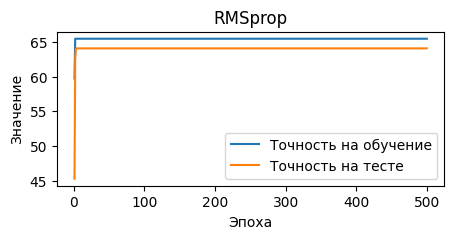

trainn accuracy: 65.45138549804688, test accuracy: 64.0625


In [351]:
model = NeuralNetwork()
adam_optim = optim.RMSprop(model.parameters(),lr=0.05,weight_decay=0.1,momentum=0.5)
train_accuracy, test_accuracy = train_model(model,train_dataloader,500,adam_optim)

print(f'trainn accuracy: {train_accuracy}, test accuracy: {test_accuracy}')

In [377]:
from sklearn import tree
from sklearn.metrics import accuracy_score


clf = tree.DecisionTreeClassifier(max_depth = 10, max_features = 10, max_leaf_nodes= 10)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8020833333333334


C:\Users\Senya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
